In [41]:
'''
PACKAGES
'''
import math
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# FIR Filter Design Endsem Assignment ITERATION 2
Name : Prajwal Nayak \\
Roll Number : 22B4246 \\

Given Specifications:
1. Filter Number (M): 114
2. Given that sampling frequency $f_s$ = 630kHz
3. We have to design FILTER TYPE II : where passband is equiripple and stopband is monotonic => we are designing a chebyschev filter.
4. Tolerances : $δ_1$ = $δ_2$ = 0.15
5. Transition Band : 5kHz on either side of each passband.
6. To find ranges of passband, M = 11Q + R. Q = M//11 and R = M % 10. D for Group I bands is Q and for Group II is R.
7. Group I of Frequency Bands: The frequency band in this group is (40 + 5𝐷) 𝑡𝑜 (70 + 5𝐷)
8. Group II of Frequency Bands: The frequency band in this group is (170 + 5𝐷) 𝑡𝑜 (200 + 5𝐷)

# Some Important Functions which are Frequently used :

In [42]:
#COMPUTING DFT
def compute_dtft(h,N, num_points=10000):
    n = np.arange(-N, N + 1)
    omega = np.linspace(-np.pi, np.pi, num_points)
    H = np.zeros(num_points, dtype=complex)
    for i, w in enumerate(omega):
        H[i] = np.sum(h * np.exp(-1j * w * n))
    return omega, H
#PLOTTING magntiude response
def plot_manual_dtft(h,k1,k2,band_list,title,N,ylim=[-0.05,1.17],delta=0.15):
    omega, H = compute_dtft(h,N)
    plt.figure(figsize=(12, 4))
    plt.plot(omega, np.abs(H), color='green', label='|H(ω)|')
    if(k1==1):
       upper = 1+delta
       lower = 1- delta
       sb_tol = delta
       plt.axhline(1 + delta, color='red', linestyle='--', label=f'Passband Upper ({1 + delta})')
       plt.axhline(1 - delta, color='red', linestyle='--', label=f'Passband Lower ({1 - delta})')
       plt.axhline(delta, color='red', linestyle='--', label=f'Passband Lower ({delta})')
       yticks = plt.yticks()[0].tolist()
       yticks.extend([upper, lower, sb_tol])
       plt.yticks(sorted(set(yticks)))
    if(k2 == 1):
       band_edges = [w3[i] for i in band_list]
       for freq in band_edges:
        plt.axvline(freq, color='gray', linestyle=':', alpha=0.7)
        extra_xticks = [w3[i] for i in band_list]
    else: extra_xticks = []
    plt.title(title)
    plt.xlabel("Magnitude")
    plt.ylabel("Frequency")
    plt.xlim([-np.pi, np.pi])
    plt.ylim(ylim)
    default_xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    default_labels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
    all_xticks = sorted(set(default_xticks + extra_xticks))
    ax = plt.gca()
    ax.set_xticks(all_xticks)
    ax.set_xticklabels(['' for _ in all_xticks])  # hide them
    for tick in all_xticks:
     if tick in default_xticks:
        idx = default_xticks.index(tick)
        label = default_labels[idx]
        ax.text(tick, ax.get_ylim()[0] - 0.02, label, ha='center', va='top', fontsize=10, usetex=False)
     else:
        ax.text(tick, ax.get_ylim()[0] - 0.02, f'{tick:.2f}', ha='center', va='top', fontsize=6, color='gray', rotation =70)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
#CHECKING TOLERANCES
def tolerance_checker(filter_coeffs,passband_pairs, stopband_pairs,N,delta=0.15):
 passband_tol = (1-delta,1+delta)
 stopband_tol = delta
 omega, H1 = compute_dtft(filter_coeffs,N)
 mag = np.abs(H1)
 for left, right in passband_pairs:
    indices = np.where((omega >= left) & (omega <= right))[0]
    band_mag = mag[indices]
    band_min = np.min(band_mag)
    band_max = np.max(band_mag)
    print(f"Passband [{left:.3f}, {right:.3f}]: min = {band_min:.6f}, max = {band_max:.6f}")
    if band_min < passband_tol[0] or band_max > passband_tol[1]:
        print("❌ Passband out of tolerance!\n")
    else:
        print("✅ Passband within tolerance.\n")

 for left, right in stopband_pairs:
    indices = np.where((omega >= left) & (omega <= right))[0]
    band_mag = mag[indices]
    band_max = np.max(band_mag)
    print(f"Stopband [{left:.3f}, {right:.3f}]: max = {band_max:.6f}")
    if band_max > stopband_tol:
        print("❌ Stopband out of tolerance!\n")
    else:
        print("✅ Stopband within tolerance.\n")

In [43]:
M = 114
Q = M//11
R = M%10
print("The value of Q is: ",Q)
print("The value of R is: ",R)
print("Group I frequency band range is from",40+5*(Q),"to",70+5*(Q))
print("Group II frequency band range is from",170+5*(R),"to",200+5*(R))
print("Transition band for Group I frequency band is",40+5*(Q)-5,"to",40+5*(Q)," and ",70+5*(Q),"to",70+5*(Q)+5)
print("Transition band for Group II frequency band is",170+5*(R)-5,"to",170+5*(R)," and ",200+5*(R),"to",200+5*(R)+5)

The value of Q is:  10
The value of R is:  4
Group I frequency band range is from 90 to 120
Group II frequency band range is from 190 to 220
Transition band for Group I frequency band is 85 to 90  and  120 to 125
Transition band for Group II frequency band is 185 to 190  and  220 to 225


In [44]:
f = [0,85,90,120,125,185,190,220,225,315]
w = []
for i in f:
  print("for f = ",i,", we have w = ",(2*math.pi*i)/630)
  w.append((2*math.pi*i)/630)
w[9] = math.pi
print(w)

for f =  0 , we have w =  0.0
for f =  85 , we have w =  0.8477313509686744
for f =  90 , we have w =  0.8975979010256552
for f =  120 , we have w =  1.19679720136754
for f =  125 , we have w =  1.246663751424521
for f =  185 , we have w =  1.8450623521082912
for f =  190 , we have w =  1.8949289021652722
for f =  220 , we have w =  2.1941282025071573
for f =  225 , we have w =  2.243994752564138
for f =  315 , we have w =  3.141592653589793
[0.0, 0.8477313509686744, 0.8975979010256552, 1.19679720136754, 1.246663751424521, 1.8450623521082912, 1.8949289021652722, 2.1941282025071573, 2.243994752564138, 3.141592653589793]


In [45]:
data = {
    "Category": ["Stopband for Group 1", "Passband for Group 1", "Stopband intermediate", "Passband for Group 2","Stopband for Group 2"],
    "Type": ["Monotonic","Monotonic","Monotonic","Monotonic","Monotonic"],
    "Un-normalised Frequency(kHz)[f]": ["0-85", "90-120", "125-185","190-220","225-315"],
    "Normalised Frequency(rad/s)[ω]": [f"{w[0]}-{w[1]}", f"{w[2]}-{w[3]}", f"{w[4]}-{w[5]}",f"{w[6]}-{w[7]}",f"{w[8]}-{w[9]}"],
}
df = pd.DataFrame(data)
df


,Category,Type,Un-normalised Frequency(kHz)[f],Normalised Frequency(rad/s)[ω]
0,Stopband for Group 1,Monotonic,0-85,0.0-0.8477313509686744
1,Passband for Group 1,Monotonic,90-120,0.8975979010256552-1.19679720136754
2,Stopband intermediate,Monotonic,125-185,1.246663751424521-1.8450623521082912
3,Passband for Group 2,Monotonic,190-220,1.8949289021652722-2.1941282025071573
4,Stopband for Group 2,Monotonic,225-315,2.243994752564138-3.141592653589793


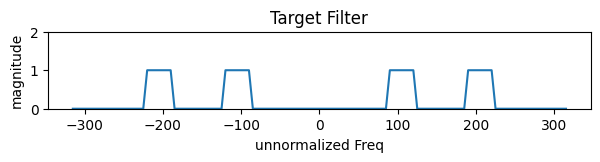

In [46]:
val = [0,0,1,1,0,0,1,1,0,0]
f2 = f[::-1]
val2 = val[::-1]
w2 = w[::-1]
f3=[i*-1 for i in f2]+f
w3=[i*-1 for i in w2]+w
valNeg = val2+val
plt.figure(figsize=(7,1))
plt.plot(f3, valNeg)
plt.title('Target Filter')
plt.ylim(0,2)
plt.xlabel('unnormalized Freq')
plt.ylabel('magnitude')
plt.show()

In [47]:
print(f3)
print(w3)

[-315, -225, -220, -190, -185, -125, -120, -90, -85, 0, 0, 85, 90, 120, 125, 185, 190, 220, 225, 315]
[-3.141592653589793, -2.243994752564138, -2.1941282025071573, -1.8949289021652722, -1.8450623521082912, -1.246663751424521, -1.19679720136754, -0.8975979010256552, -0.8477313509686744, -0.0, 0.0, 0.8477313509686744, 0.8975979010256552, 1.19679720136754, 1.246663751424521, 1.8450623521082912, 1.8949289021652722, 2.1941282025071573, 2.243994752564138, 3.141592653589793]


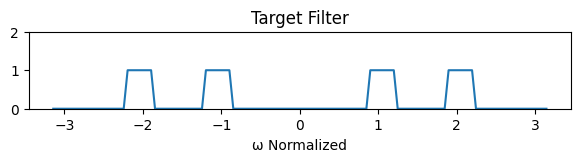

In [48]:
plt.figure(figsize=(7,1))
plt.plot(w3, valNeg)
plt.ylim(0,2)
plt.xlabel('ω Normalized')
plt.title("Target Filter")
plt.show()

# Procedure:

1. To achieve a multi-bandpass filter, the task can be divided into designing
two separate bandpass filters.
2. The final multi-bandpass filter can then be obtained by cascading
or implementing a parallel combination of the two filters. Since the
3. My approach :Two Bandpass Filters in parallel
4. Since the two passbands are far away, the tolerance for the individual bandpass filters need not be changed as the stopband value would be extremely small far away from the stop band.
5. So for the individual bandpass filters we use tolerance = 0.15.
6. We implement the above target filter using parallel of two bandpass filters, we name them BP1 and BP2.


$$
H_{\text{final}}(e^{j\omega}) = H_{\text{BP1}}(e^{j\omega}) + H_{\text{BP2}}(e^{j\omega})
$$

$$
h_{\text{final}}[n] = h_{\text{BP1}}[n] + h_{\text{BP2}}[n]
$$


## Designing the Bandpass Filter BP1:
1. We first design two lowpassfilters : LP11 and LP12.
2. We subtract them to get the bandpass filter
3. We have to make sure that the tolerances are within limits. We use now test with tolerance = 0.15 for each low pass filter.

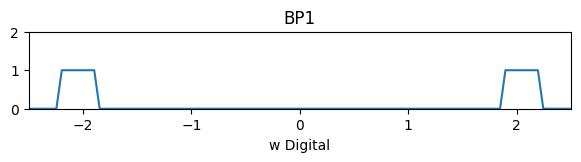

In [49]:
val_bp1=[0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0]
plt.figure(figsize=(7,1))
plt.plot(w3,val_bp1)
plt.ylim(0,2)
plt.xlim(-2.5,2.5)
plt.xlabel('w Digital')
plt.title("BP1")
plt.show()

We now have to show this as a difference of two lowpass filter. The low pass filters are as follows.

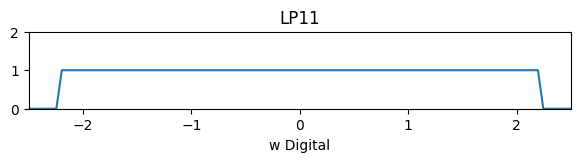

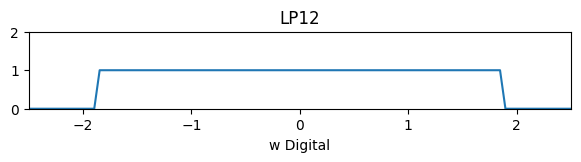

In [50]:
val_bp1=[0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0]
plt.figure(figsize=(7,1))
plt.plot(w3,val_bp1)
plt.ylim(0,2)
plt.xlim(-2.5,2.5)
plt.xlabel('w Digital')
plt.title("LP11")
plt.show()
val_bp1=[0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0]
plt.figure(figsize=(7,1))
plt.plot(w3,val_bp1)
plt.ylim(0,2)
plt.xlim(-2.5,2.5)
plt.xlabel('w Digital')
plt.title("LP12")
plt.show()

### Ideal LowPass Filter Coefficients

In [51]:
def ideal_lowpass(wc,N):
  value = np.zeros(2*N+1)
  for k in range(-N,N+1):
    if(k!=0):
     numerator = math.sin(wc*k)
     denominator = k*math.pi
     value[k+N] = numerator/denominator
    else:
     value[k+N] = wc/math.pi
  return value

### General Calculations for Kaiser Window Parameters for Low Pass Filters

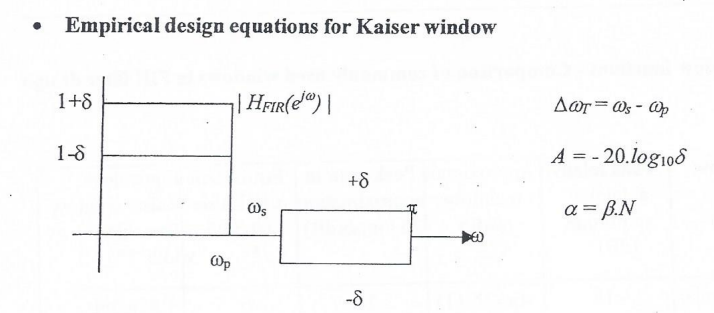

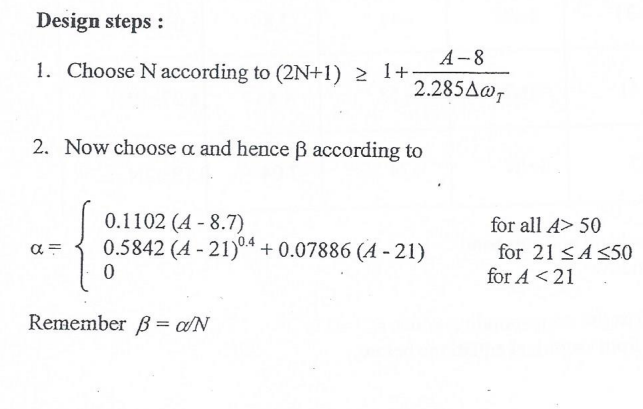

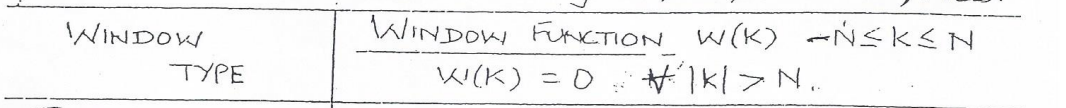

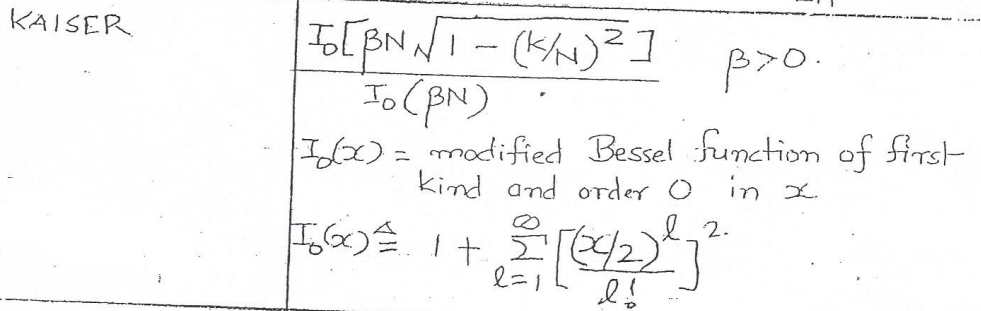

In [52]:
tol = 0.15
delta_w_t = w3[18] - w3[17] #this is constant for all the low pass filters (transition width)
A = -20*math.log10(tol)
print("The value of delta_w_t is,",delta_w_t)
print("The value of A is,",A)
N=math.ceil((A-8)/(2*2.285*delta_w_t))#this is th eminimum N value we should choose
print("The minimum value of N is :",N)
# Let us take a slightly higher value of N
N = N + 8
print("We use the value of N to be :",N)
alpha = 0
if(A>=21 and A<=50):
  alpha= 0.5842*((A-21)**0.4) + 0.07886*(A-21)
elif(A>50):
  alpha = 0.1102*(A-8.7)
print("Alpha value given by the equation is: ", alpha)
print("The tweaked value of alpha is ",alpha)

The value of delta_w_t is, 0.049866550056980596
The value of A is, 16.478174818886377
The minimum value of N is : 38
We use the value of N to be : 46
Alpha value given by the equation is:  0
The tweaked value of alpha is  0


In [53]:
def Bessel_function(x,terms=25):
  s = 1
  l = 1
  while(l<=terms):
    s = s + (((x/2)**l)/(math.factorial(l)))**2
    l = l + 1
  return s

def kaiser_window(alpha,N):
  value = np.zeros(2*N+1)
  for k in range(-N,N+1):
   numerator = Bessel_function(alpha*math.sqrt((1-(k/N)**2)))
   denominator = Bessel_function(alpha)
   value[k+N] = numerator/denominator
  return value

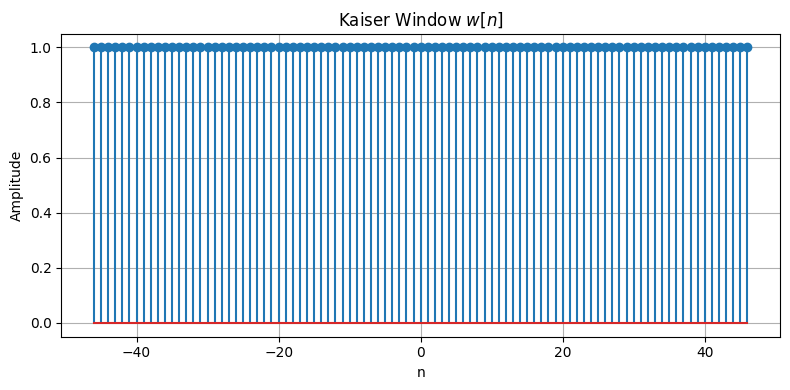

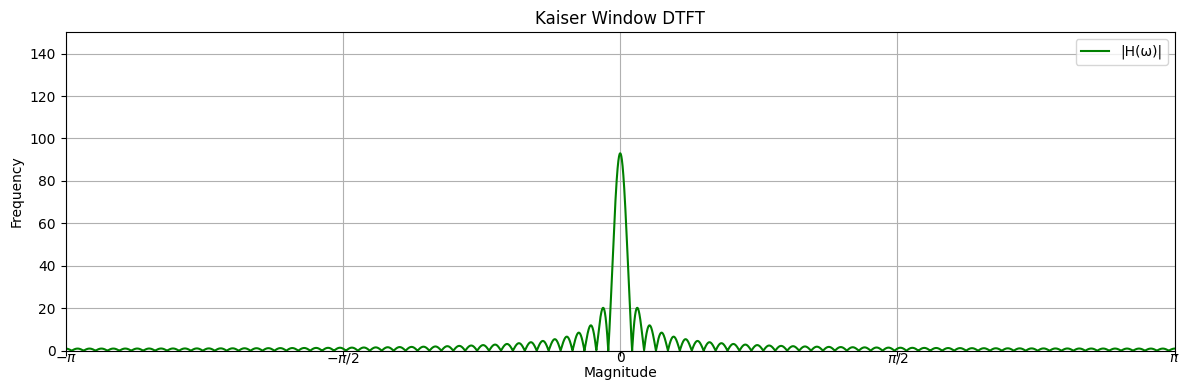

In [54]:
kaiser_coeff = kaiser_window(alpha,N)
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), kaiser_coeff)
plt.title('Kaiser Window $w[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(kaiser_coeff,0,0,[],"Kaiser Window DTFT",N, ylim=[-0.01, 150])

In [55]:
import numpy as np
w = kaiser_coeff
np.set_printoptions(precision=4, suppress=True)
with open("kaiser.tex", "w") as f:
    for i, val in enumerate(w):
        f.write(f"Kaiser[{i-66}]: {val:.4f}")
        if (i + 1) % 5 == 0:
            f.write(" \\\\\n")
        else:
            f.write(" & ")

### Ideal Low Pass Filter coefficients

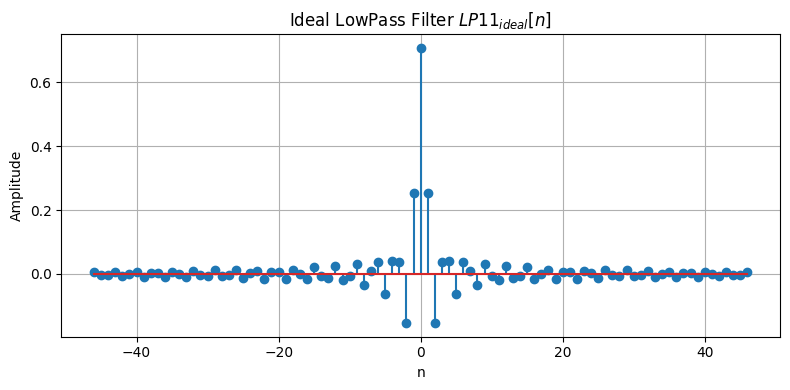

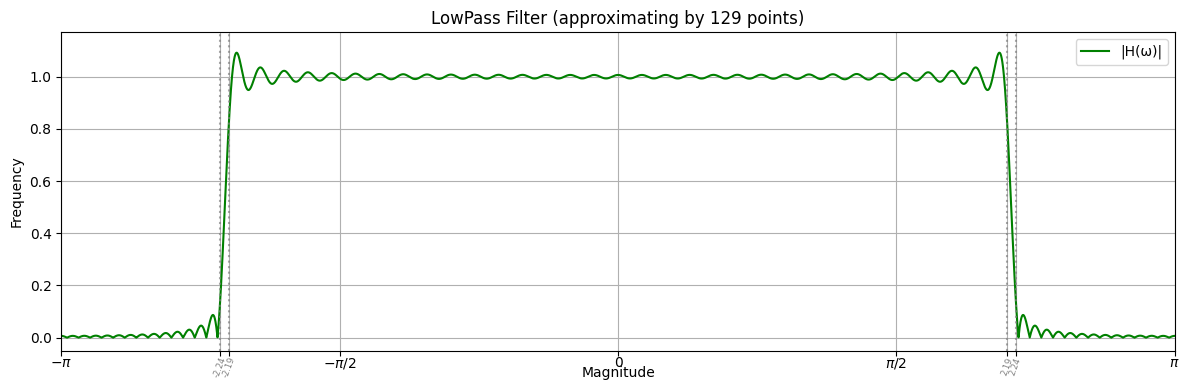

In [56]:
lp11_ideal = ideal_lowpass((w3[17]+w3[18])/2,N)
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), lp11_ideal)
plt.title('Ideal LowPass Filter $LP11_{ideal}[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(lp11_ideal,0,1,[1,2,17,18],"LowPass Filter (approximating by 129 points)",N)

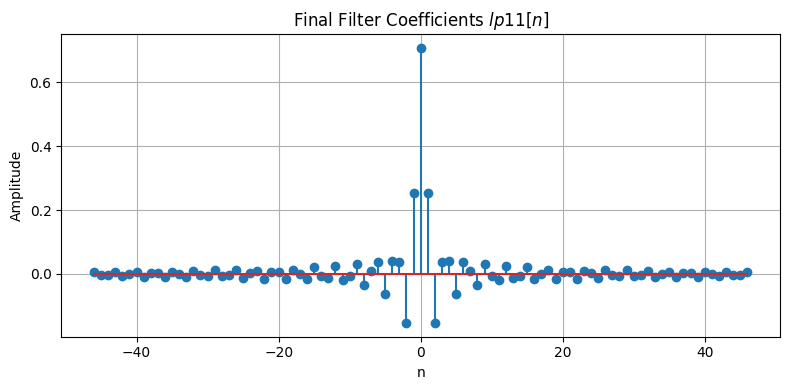

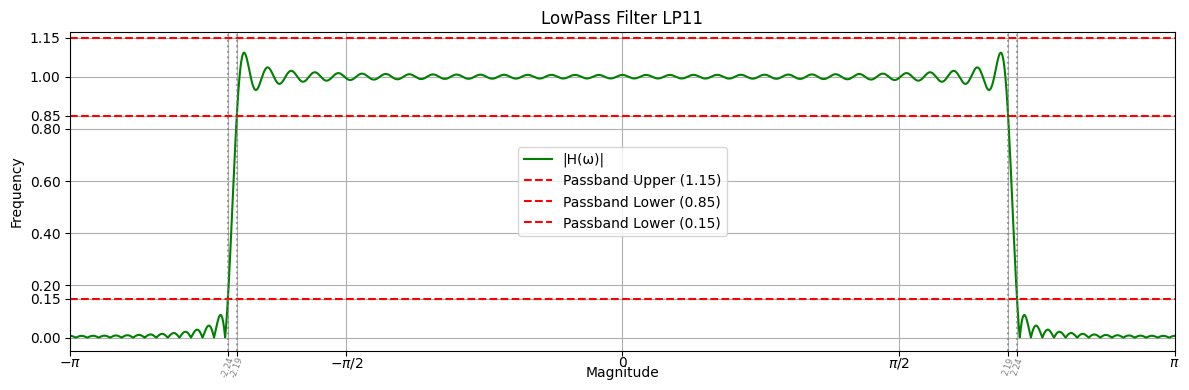

In [57]:
lp11 = lp11_ideal*kaiser_coeff
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), lp11)
plt.title('Final Filter Coefficients $lp11[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(lp11_ideal,1,1,[1,2,17,18],"LowPass Filter LP11",N)

### Checking if tolerances levels are respected

In [58]:
tolerance_checker(lp11,[(w3[2],w3[17])],[(w3[0],w3[1]),(w3[18],w3[19])],N)

Passband [-2.194, 2.194]: min = 0.846407, max = 1.091941
❌ Passband out of tolerance!

Stopband [-3.142, -2.244]: max = 0.150039
❌ Stopband out of tolerance!

Stopband [2.244, 3.142]: max = 0.150039
❌ Stopband out of tolerance!



We are ready with Low pass Filter LPF11. Now we similarly design LPF12.

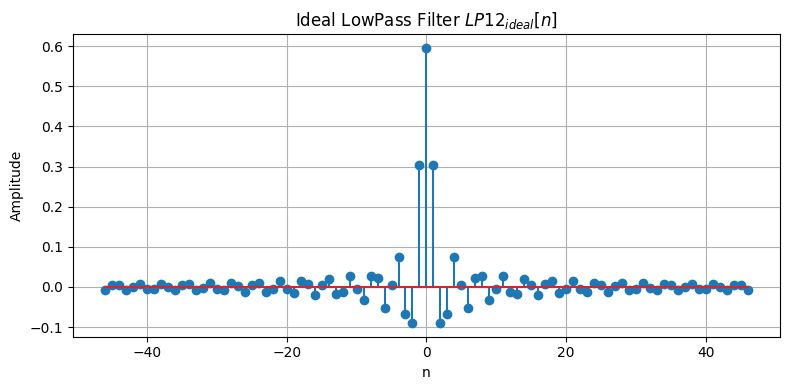

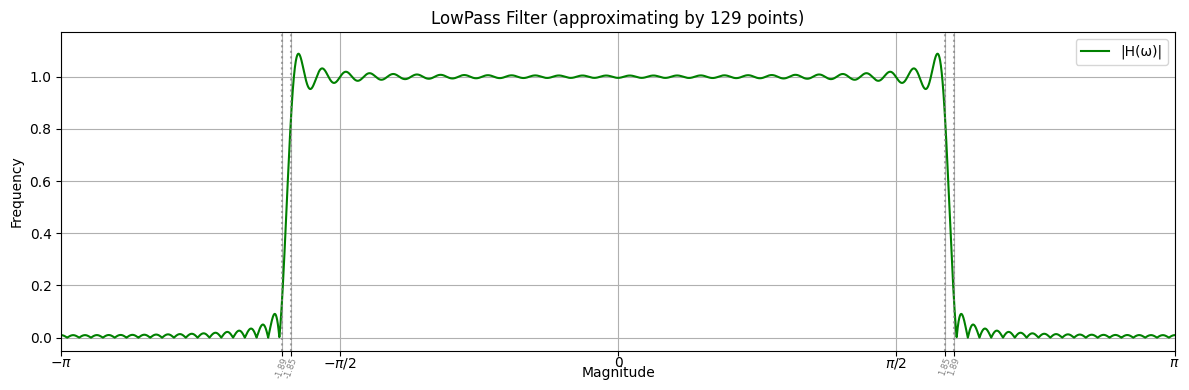

In [59]:
lp12_ideal = ideal_lowpass((w3[15]+w3[16])/2,N)
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), lp12_ideal)
plt.title('Ideal LowPass Filter $LP12_{ideal}[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(lp12_ideal,0,1,[3,4,15,16],"LowPass Filter (approximating by 129 points)",N)

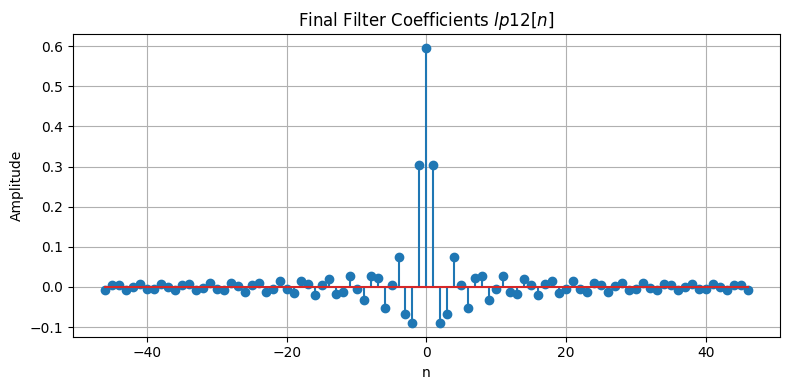

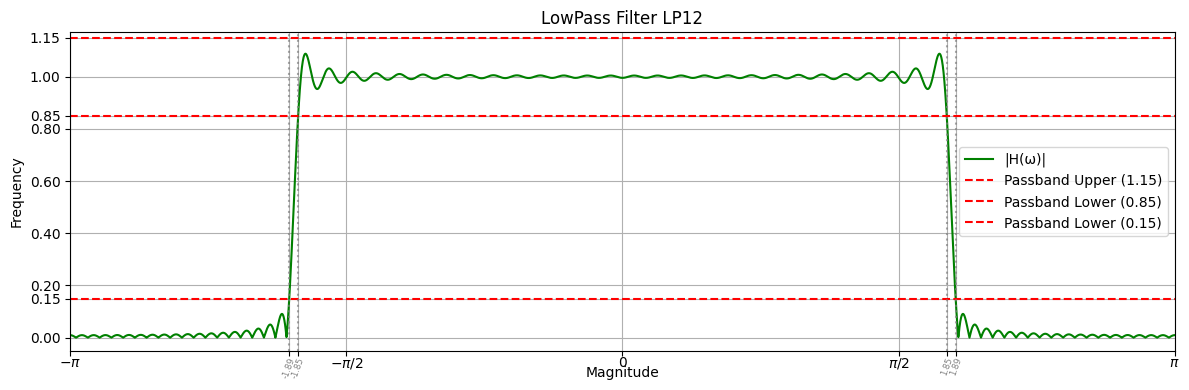

In [60]:
lp12 = lp12_ideal*kaiser_coeff
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), lp12)
plt.title('Final Filter Coefficients $lp12[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(lp12,1,1,[3,4,15,16],"LowPass Filter LP12",N)

### Checking if tolerances levels are respected

In [61]:
tolerance_checker(lp12,[(w3[4],w3[15])],[(w3[0],w3[3]),(w3[16],w3[19])],N)

Passband [-1.845, 1.845]: min = 0.851368, max = 1.088030
✅ Passband within tolerance.

Stopband [-3.142, -1.895]: max = 0.148207
✅ Stopband within tolerance.

Stopband [1.895, 3.142]: max = 0.148207
✅ Stopband within tolerance.



Since both the LPFs are ready, lets subtract them to get the bandpass filter!!

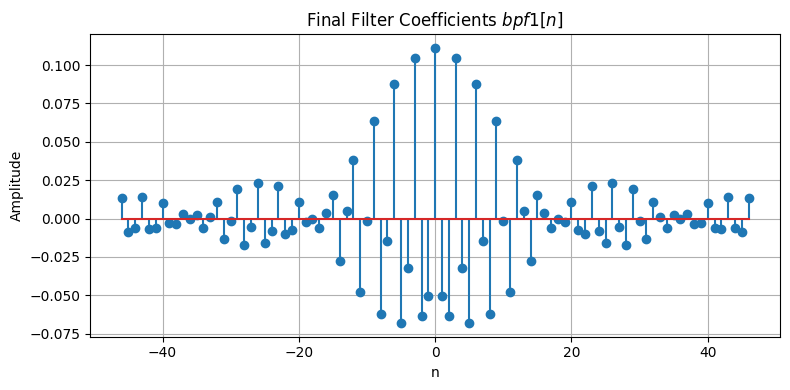

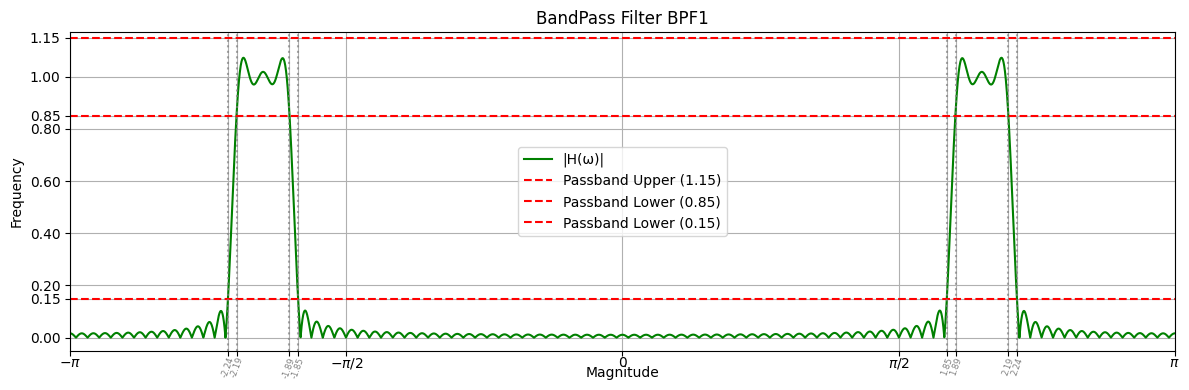

In [62]:
bpf1 = lp11 - lp12
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), bpf1)
plt.title('Final Filter Coefficients $bpf1[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(bpf1,1,1,[1,2,3,4,15,16,17,18],"BandPass Filter BPF1",N,delta=0.15)

In [63]:
tolerance_checker(bpf1,[(w3[2],w3[3]),(w3[16],w3[17])],[(w3[0],w3[1]),(w3[13],w3[15]),(w3[18],w3[19])],N,delta=0.15)

Passband [-2.194, -1.895]: min = 0.865825, max = 1.072496
✅ Passband within tolerance.

Passband [1.895, 2.194]: min = 0.865825, max = 1.072496
✅ Passband within tolerance.

Stopband [-3.142, -2.244]: max = 0.145106
✅ Stopband within tolerance.

Stopband [1.197, 1.845]: max = 0.143817
✅ Stopband within tolerance.

Stopband [2.244, 3.142]: max = 0.145106
✅ Stopband within tolerance.



In [64]:
import numpy as np
w = bpf1
np.set_printoptions(precision=4, suppress=True)
with open("bpf1.tex", "w") as f:
    for i, val in enumerate(w):
        f.write(f"BPF1[{i-66}]: {val:.4f}")
        if (i + 1) % 5 == 0:
            f.write(" \\\\\hline\n ")
        else:
            f.write(" & ")

## Designing the Bandpass Filter BP2:
1. We first design two lowpassfilters : LP21 and LP22.
2. We subtract them to get the bandpass filter
3. We have to make sure that the tolerances are within limits. We use tolerance = 0.15/2 = 0.075 for each low pass filter.

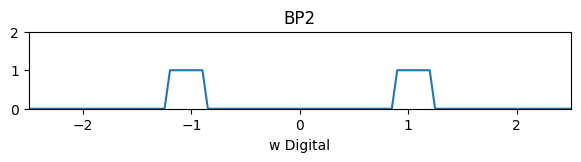

In [65]:
val_bp2=[0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0]
plt.figure(figsize=(7,1))
plt.plot(w3,val_bp2)
plt.ylim(0,2)
plt.xlim(-2.5,2.5)
plt.xlabel('w Digital')
plt.title("BP2")
plt.show()

We now have to show this as a difference of two lowpass filter. The low pass filters are as follows.

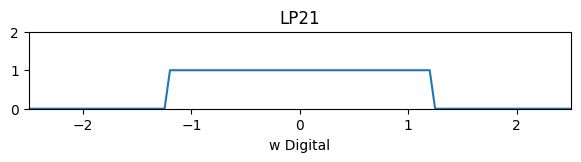

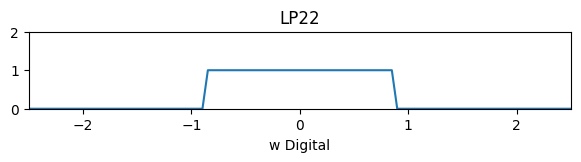

In [66]:
val_lp21=[0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0]
plt.figure(figsize=(7,1))
plt.plot(w3,val_lp21)
plt.ylim(0,2)
plt.xlim(-2.5,2.5)
plt.xlabel('w Digital')
plt.title("LP21")
plt.show()
val_lp22=[0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0]
plt.figure(figsize=(7,1))
plt.plot(w3,val_lp22)
plt.ylim(0,2)
plt.xlim(-2.5,2.5)
plt.xlabel('w Digital')
plt.title("LP22")
plt.show()

### Ideal Low Pass Filter coefficients

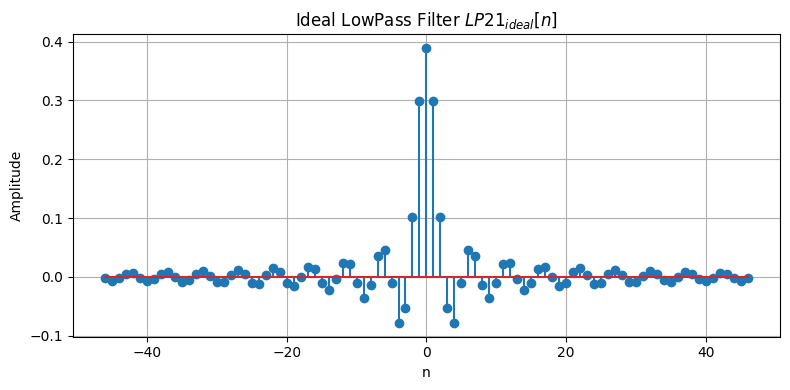

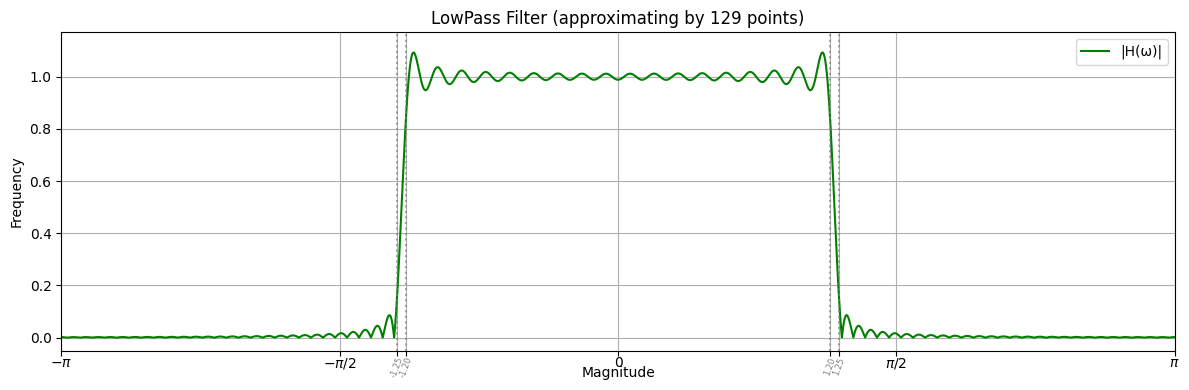

In [67]:
lp21_ideal = ideal_lowpass((w3[13]+w3[14])/2,N)
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), lp21_ideal)
plt.title('Ideal LowPass Filter $LP21_{ideal}[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(lp21_ideal,0,1,[5,6,13,14],"LowPass Filter (approximating by 129 points)",N)

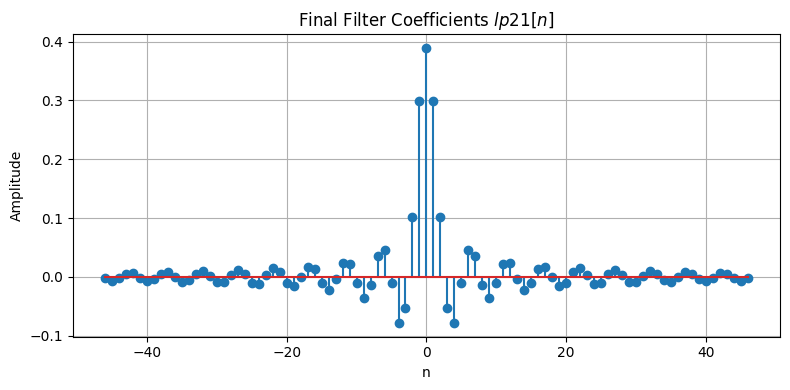

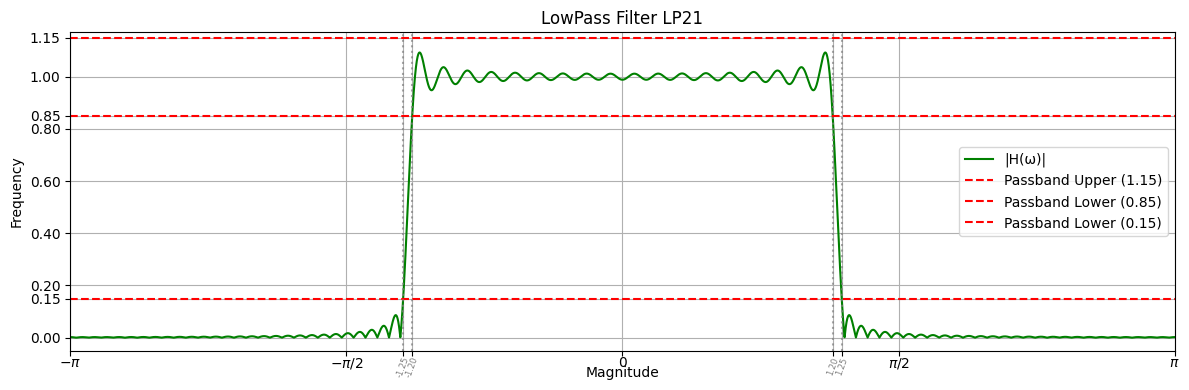

In [68]:
lp21 = lp21_ideal*kaiser_coeff
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), lp21)
plt.title('Final Filter Coefficients $lp21[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(lp21,1,1,[5,6,13,14],"LowPass Filter LP21",N)

### Checking if tolerances levels are respected

In [69]:
tolerance_checker(lp21,[(w3[6],w3[13])],[(w3[0],w3[5]),(w3[14],w3[19])],N)

Passband [-1.197, 1.197]: min = 0.840172, max = 1.092722
❌ Passband out of tolerance!

Stopband [-3.142, -1.247]: max = 0.153689
❌ Stopband out of tolerance!

Stopband [1.247, 3.142]: max = 0.153689
❌ Stopband out of tolerance!



We are ready with Low pass Filter LPF21. Now we similarly design LPF22.

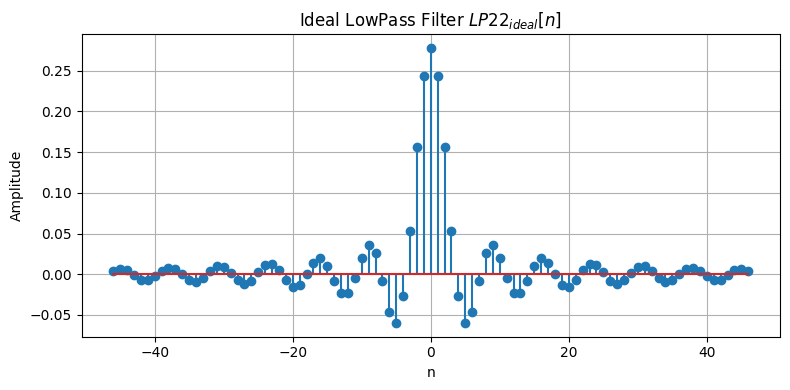

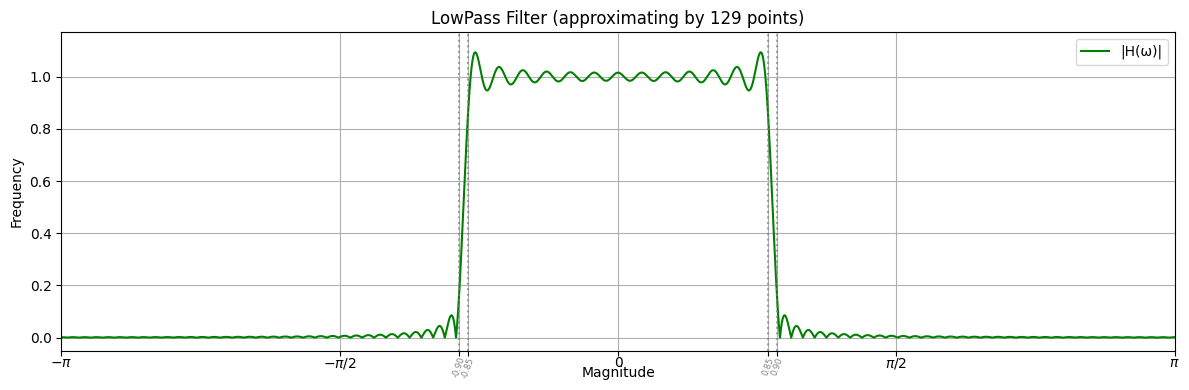

In [70]:
lp22_ideal = ideal_lowpass((w3[11]+w3[12])/2,N)
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), lp22_ideal)
plt.title('Ideal LowPass Filter $LP22_{ideal}[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(lp22_ideal,0,1,[7,8,11,12],"LowPass Filter (approximating by 129 points)",N)

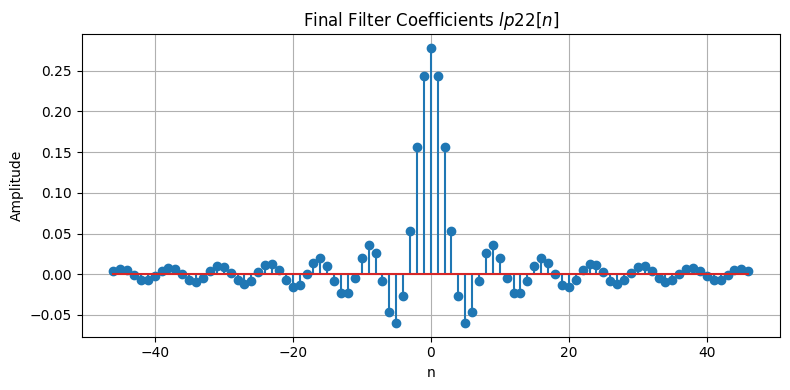

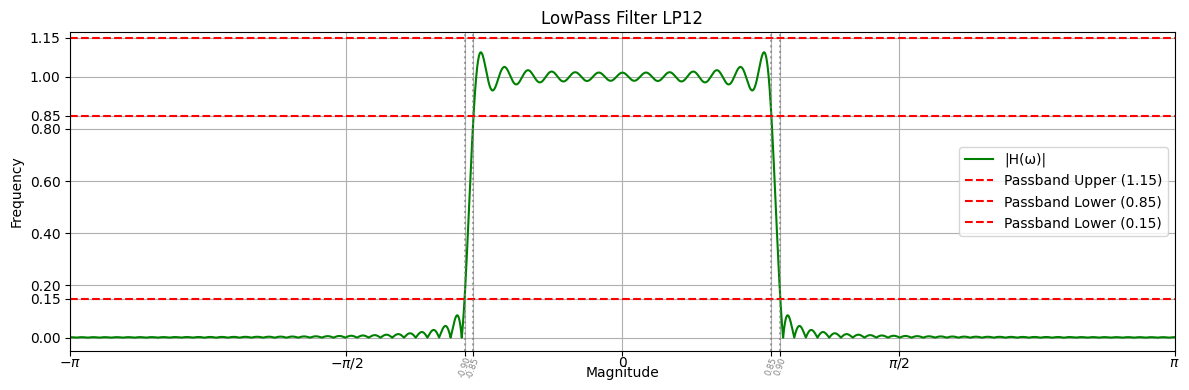

In [71]:
lp22= lp22_ideal*kaiser_coeff
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), lp22)
plt.title('Final Filter Coefficients $lp22[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(lp22,1,1,[7,8,11,12],"LowPass Filter LP12",N)

### Checking if tolerances levels are respected

In [72]:
tolerance_checker(lp22,[(w3[8],w3[11])],[(w3[0],w3[7]),(w3[12],w3[19])],N)

Passband [-0.848, 0.848]: min = 0.847386, max = 1.093485
❌ Passband out of tolerance!

Stopband [-3.142, -0.898]: max = 0.153323
❌ Stopband out of tolerance!

Stopband [0.898, 3.142]: max = 0.153323
❌ Stopband out of tolerance!



Let this be out of bound, because even when this is out of bounds, the final filter satisfies the necessary conditions.

Since both the LPFs are ready, lets subtract them to get the bandpass filter!!

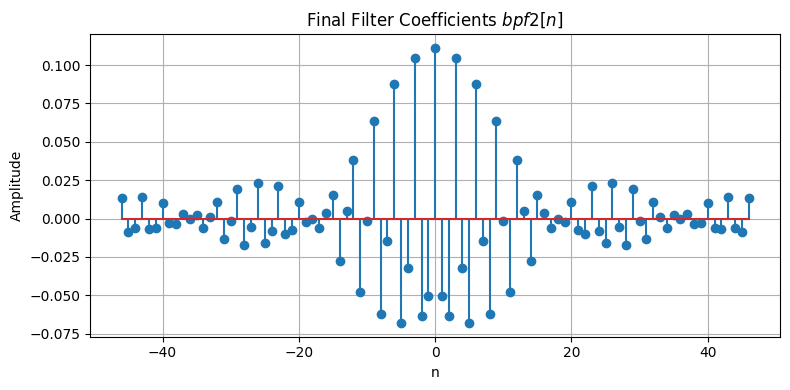

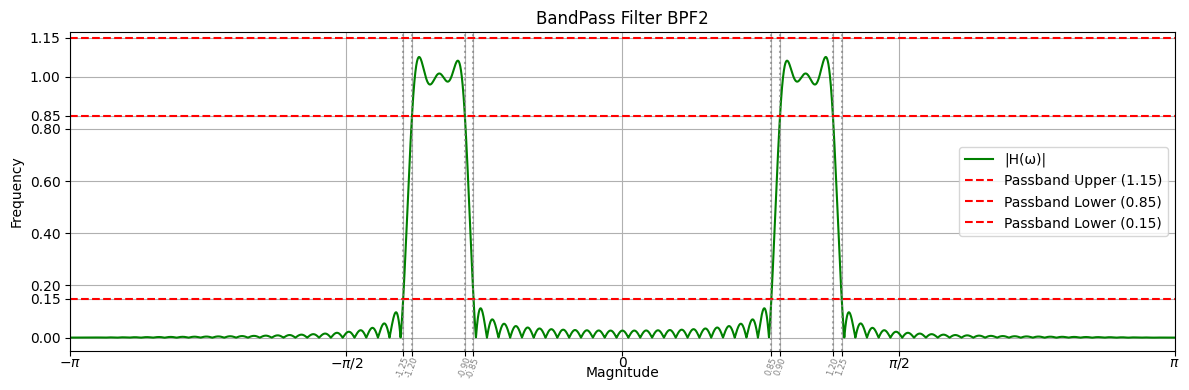

In [73]:
bpf2 = lp21 - lp22
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), bpf1)
plt.title('Final Filter Coefficients $bpf2[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(bpf2,1,1,[5,6,7,8,11,12,13,14],"BandPass Filter BPF2",N,delta=0.15)

In [74]:
import numpy as np
w = bpf2
np.set_printoptions(precision=4, suppress=True)
with open("bpf2.tex", "w") as f:
    for i, val in enumerate(w):
        f.write(f"BPF2[{i-66}]: {val:.4f}")
        if (i + 1) % 5 == 0:
            f.write(" \\\\\hline\n ")
        else:
            f.write(" & ")

In [75]:
tolerance_checker(bpf2,[(w3[6],w3[7]),(w3[12],w3[13])],[(w3[0],w3[5]),(w3[8],w3[11]),(w3[14],w3[19])],N,delta=0.15)

Passband [-1.197, -0.898]: min = 0.854701, max = 1.075537
✅ Passband within tolerance.

Passband [0.898, 1.197]: min = 0.854701, max = 1.075537
✅ Passband within tolerance.

Stopband [-3.142, -1.247]: max = 0.150825
❌ Stopband out of tolerance!

Stopband [-0.848, 0.848]: max = 0.152789
❌ Stopband out of tolerance!

Stopband [1.247, 3.142]: max = 0.150825
❌ Stopband out of tolerance!



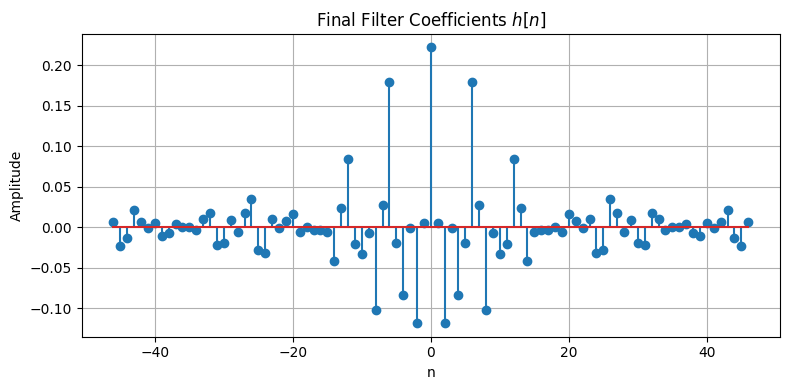

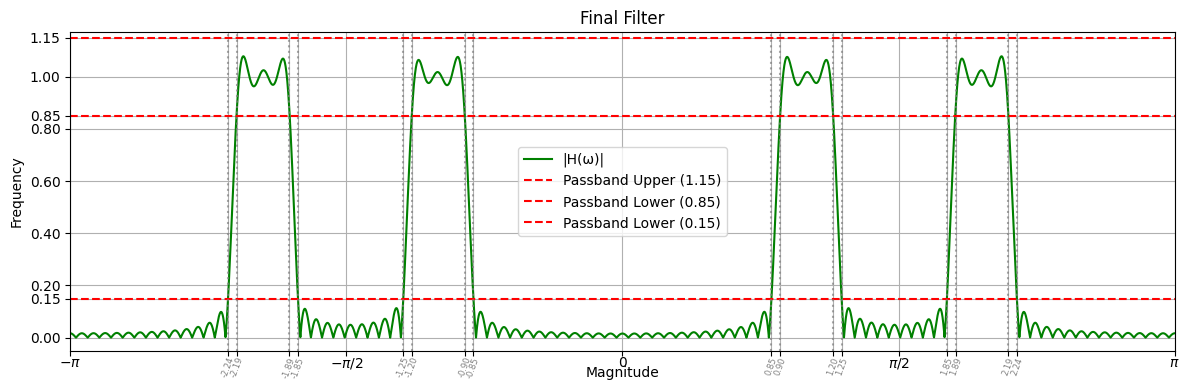

In [76]:
final_filter = bpf1 + bpf2
plt.figure(figsize=(8, 4))
plt.stem(np.arange(-N, N+1), final_filter)
plt.title('Final Filter Coefficients $h[n]$')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plot_manual_dtft(final_filter,1,1,[1,2,3,4,5,6,7,8,11,12,13,14,15,16,17,18],"Final Filter",N,delta=0.15)

In [77]:
tolerance_checker(final_filter,[(w3[2],w3[3]),(w3[6],w3[7]),(w3[12],w3[13]),(w3[16],w3[17])],[(w3[0],w3[1]),(w3[4],w3[5]),(w3[8],w3[11]),(w3[14],w3[15]),(w3[18],w3[19])],N,delta=0.15)

Passband [-2.194, -1.895]: min = 0.866972, max = 1.078285
✅ Passband within tolerance.

Passband [-1.197, -0.898]: min = 0.859377, max = 1.075910
✅ Passband within tolerance.

Passband [0.898, 1.197]: min = 0.859377, max = 1.075910
✅ Passband within tolerance.

Passband [1.895, 2.194]: min = 0.866972, max = 1.078285
✅ Passband within tolerance.

Stopband [-3.142, -2.244]: max = 0.140608
✅ Stopband within tolerance.

Stopband [-1.845, -1.247]: max = 0.144472
✅ Stopband within tolerance.

Stopband [-0.848, 0.848]: max = 0.147065
✅ Stopband within tolerance.

Stopband [1.247, 1.845]: max = 0.144472
✅ Stopband within tolerance.

Stopband [2.244, 3.142]: max = 0.140608
✅ Stopband within tolerance.



In [78]:
import numpy as np
w = final_filter
np.set_printoptions(precision=4, suppress=True)
with open("final.tex", "w") as f:
    for i, val in enumerate(w):
        f.write(f"final\_filter[{i-66}]: {val:.4f}")
        if (i + 1) % 4 == 0:
            f.write(" \\\\\hline\n ")
        else:
            f.write(" & ")

ALL THE PASSBANDS AND THE STOPBANDS ARE RESPECTING THE GIVEN TOLERANCES!!

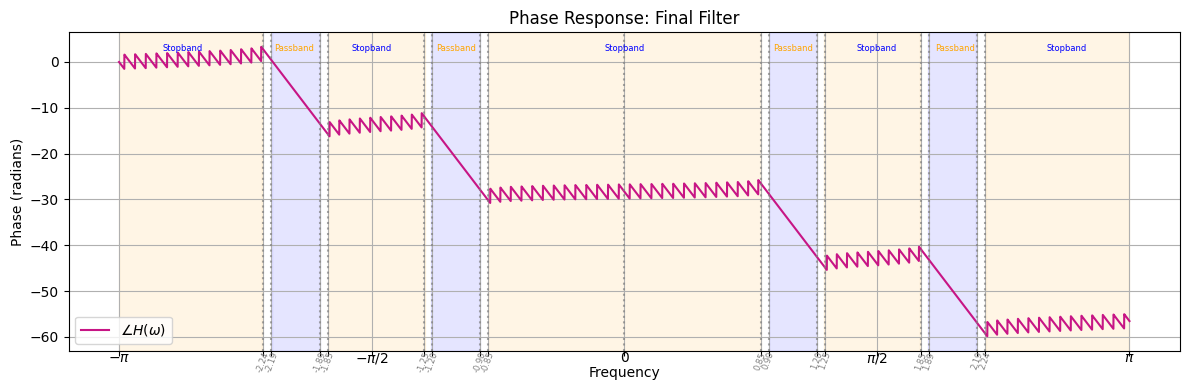

In [79]:
def plot_dtft_phase_only(h, band_list, title="Phase Response", num_points=10000):
    n = np.arange(len(h))
    omega = np.linspace(-np.pi, np.pi, num_points)
    H = np.array([np.sum(h * np.exp(-1j * w * n)) for w in omega])
    mag = np.abs(H)
    phase = np.angle(H)
    unwrapped_phase = np.unwrap(phase)
    plt.figure(figsize=(12, 4))
    plt.plot(omega, unwrapped_phase, color='mediumvioletred', label=r'$\angle H(\omega)$')
    plt.title(title)
    band_edges = [w3[i] for i in band_list]
    for freq in band_edges:
        plt.axvline(freq, color='gray', linestyle=':', alpha=0.7)
        extra_xticks = [w3[i] for i in band_list]
    plt.xlabel("Frequency")
    plt.ylabel("Phase (radians)")
    default_xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    default_labels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
    all_xticks = sorted(set(default_xticks + extra_xticks))
    ax = plt.gca()
    ax.set_xticks(all_xticks)
    ax.set_xticklabels(['' for _ in all_xticks])  # hide them
    for tick in all_xticks:
     if tick in default_xticks:
        idx = default_xticks.index(tick)
        label = default_labels[idx]
        ax.text(tick, ax.get_ylim()[0] - 0.02, label, ha='center', va='top', fontsize=10, usetex=False)
     else:
        ax.text(tick, ax.get_ylim()[0] - 0.02, f'{tick:.2f}', ha='center', va='top', fontsize=6, color='gray', rotation =70)
    plt.axvspan(-np.pi, -2.25, color='orange', alpha=0.1)
    plt.axvspan(2.25, np.pi, color='orange', alpha=0.1)
    plt.axvspan(-1.84, -1.24, color='orange', alpha=0.1)
    plt.axvspan(1.84, 1.24, color='orange', alpha=0.1)
    plt.axvspan(-0.85, 0.85, color='orange', alpha=0.1)
    plt.text(-7*np.pi/8, plt.ylim()[1] - 4 , 'Stopband', ha='center', fontsize=6, color='blue')
    plt.text(7*np.pi/8, plt.ylim()[1] - 4 , 'Stopband', ha='center', fontsize=6, color='blue')
    plt.text(-4*np.pi/8, plt.ylim()[1] - 4 , 'Stopband', ha='center', fontsize=6, color='blue')
    plt.text(4*np.pi/8, plt.ylim()[1] - 4 , 'Stopband', ha='center', fontsize=6, color='blue')
    plt.text(0, plt.ylim()[1] - 4 , 'Stopband', ha='center', fontsize=6, color='blue')

    plt.axvspan(-2.19, -1.89, color='blue', alpha=0.1)
    plt.axvspan(1.89, 2.19, color='blue', alpha=0.1)
    plt.axvspan(-1.20, -0.90, color='blue', alpha=0.1)
    plt.axvspan(1.2,0.9, color='blue', alpha=0.1)
    plt.text(-53*np.pi/81, plt.ylim()[1] - 4 , 'Passband', ha='center', fontsize=6, color='orange')
    plt.text(53*np.pi/81, plt.ylim()[1] - 4 , 'Passband', ha='center', fontsize=6, color='orange')
    plt.text(np.pi/3, plt.ylim()[1] - 4 , 'Passband', ha='center', fontsize=6, color='orange')
    plt.text(-np.pi/3, plt.ylim()[1] - 4 , 'Passband', ha='center', fontsize=6, color='orange')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_dtft_phase_only(final_filter,[1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18], title="Phase Response: Final Filter")

In [80]:
b = final_filter
z = sp.Symbol('z', complex=True)
H_z = sum(b[i] * z**(-i) for i in range(len(b)))
latex_str = sp.latex(H_z)
print("Transfer Function H(z) in LaTeX:")
print(f"H(z) = {latex_str}")

Transfer Function H(z) in LaTeX:
H(z) = 0.00654441789021803 - \frac{0.022967682402231}{z} - \frac{0.0129847660571661}{z^{2}} + \frac{0.0208510862870177}{z^{3}} + \frac{0.00656343923121179}{z^{4}} - \frac{0.000506071245735948}{z^{5}} + \frac{0.00506430469995528}{z^{6}} - \frac{0.0111436293863623}{z^{7}} - \frac{0.00665636158881766}{z^{8}} + \frac{0.00438927986679857}{z^{9}} + \frac{2.51589970554731 \cdot 10^{-17}}{z^{10}} + \frac{0.000840304135424273}{z^{11}} - \frac{0.00269914340174221}{z^{12}} + \frac{0.0103665822353876}{z^{13}} + \frac{0.0173056851041171}{z^{14}} - \frac{0.021289406343366}{z^{15}} - \frac{0.0197509918457854}{z^{16}} + \frac{0.00869442788404572}{z^{17}} - \frac{0.00595700195772633}{z^{18}} + \frac{0.0183317980016775}{z^{19}} + \frac{0.0354244305793154}{z^{20}} - \frac{0.0277980688047231}{z^{21}} - \frac{0.0313646649515825}{z^{22}} + \frac{0.0104963536002844}{z^{23}} - \frac{0.000791382364613808}{z^{24}} + \frac{0.00757880681389978}{z^{25}} + \frac{0.0163167257352698}{